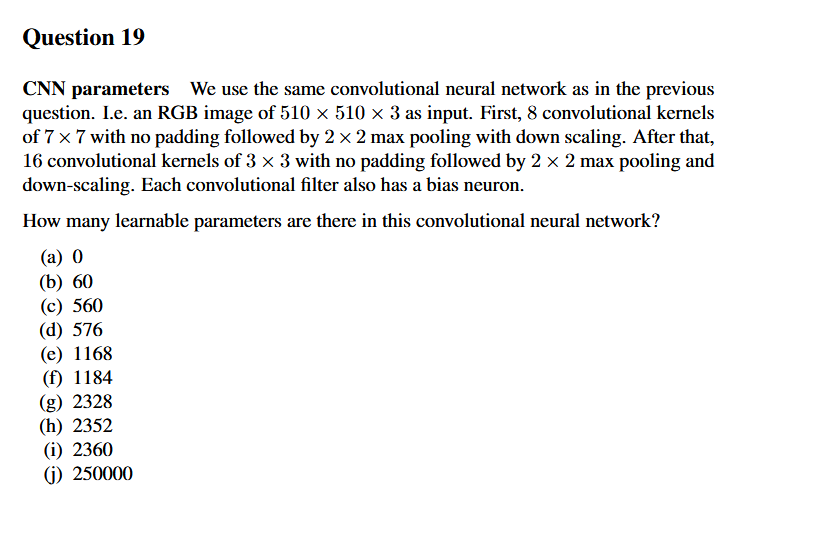

In [1]:
import torch
import torch.nn as nn
import math

class CNNReceptiveField(nn.Module):
    def __init__(self, input_channels=3, conv1_out=32, conv2_out=64, 
                 conv1_kernel=3, conv2_kernel=3, pool_kernel=2, 
                 conv1_stride=1, conv2_stride=1, pool_stride=2,
                 conv1_padding=1, conv2_padding=1, pool_padding=0,
                 use_bias=True):
        super(CNNReceptiveField, self).__init__()
        
        self.use_bias = use_bias
        
        # Define layers
        self.conv1 = nn.Conv2d(input_channels, conv1_out, 
                              kernel_size=conv1_kernel, stride=conv1_stride, 
                              padding=conv1_padding, bias=use_bias)
        
        self.pool1 = nn.MaxPool2d(kernel_size=pool_kernel, stride=pool_stride, 
                                 padding=pool_padding)
        
        self.conv2 = nn.Conv2d(conv1_out, conv2_out, 
                              kernel_size=conv2_kernel, stride=conv2_stride, 
                              padding=conv2_padding, bias=use_bias)
        
        self.pool2 = nn.MaxPool2d(kernel_size=pool_kernel, stride=pool_stride, 
                                 padding=pool_padding)
        
        # Store layer parameters for receptive field calculation
        self.layer_params = [
            {'type': 'conv', 'kernel': conv1_kernel, 'stride': conv1_stride, 'padding': conv1_padding},
            {'type': 'pool', 'kernel': pool_kernel, 'stride': pool_stride, 'padding': pool_padding},
            {'type': 'conv', 'kernel': conv2_kernel, 'stride': conv2_stride, 'padding': conv2_padding},
            {'type': 'pool', 'kernel': pool_kernel, 'stride': pool_stride, 'padding': pool_padding}
        ]
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        return x
    
    def calculate_receptive_field(self):
        """Calculate receptive field at each layer"""
        rf = 1  # Initial receptive field
        stride_product = 1  # Cumulative stride
        
        print("Receptive Field Calculation:")
        print("=" * 50)
        print(f"Initial receptive field: {rf}")
        
        for i, layer in enumerate(self.layer_params):
            layer_type = layer['type']
            kernel = layer['kernel']
            stride = layer['stride']
            
            # Update receptive field
            rf = rf + (kernel - 1) * stride_product
            stride_product *= stride
            
            print(f"After {layer_type}{i//2 + 1}: RF = {rf}, Cumulative stride = {stride_product}")
        
        return rf
    
    def calculate_output_size(self, input_height, input_width):
        """Calculate output dimensions after each layer"""
        h, w = input_height, input_width
        
        print(f"\nOutput Size Calculation:")
        print("=" * 50)
        print(f"Input size: {h} x {w}")
        
        for i, layer in enumerate(self.layer_params):
            kernel = layer['kernel']
            stride = layer['stride']
            padding = layer['padding']
            
            # Calculate output size using formula: (input + 2*padding - kernel) / stride + 1
            h = math.floor((h + 2*padding - kernel) / stride + 1)
            w = math.floor((w + 2*padding - kernel) / stride + 1)
            
            layer_type = layer['type']
            print(f"After {layer_type}{i//2 + 1}: {h} x {w}")
        
        return h, w
    
    def count_parameters(self):
        """Count total number of parameters"""
        total_params = 0
        
        print(f"\nParameter Count:")
        print("=" * 50)
        
        for name, param in self.named_parameters():
            param_count = param.numel()
            total_params += param_count
            print(f"{name}: {param_count:,} parameters")
        
        print(f"Total parameters: {total_params:,}")
        print(f"Bias enabled: {self.use_bias}")
        
        return total_params

def main():
    # Configuration
    INPUT_HEIGHT = 510
    INPUT_WIDTH = 510
    INPUT_CHANNELS = 3
    
    # Layer configuration
    CONV1_OUT_CHANNELS = 8
    CONV2_OUT_CHANNELS = 16
    CONV1_KERNEL = 7
    CONV2_KERNEL = 3
    POOL_KERNEL = 2
    USE_BIAS = True  # Set to False to disable biases
    
    print("CNN Receptive Field and Parameter Calculator")
    print("=" * 60)
    print(f"Input image size: {INPUT_CHANNELS} x {INPUT_HEIGHT} x {INPUT_WIDTH}")
    print(f"Architecture: Conv({CONV1_KERNEL}x{CONV1_KERNEL}) -> MaxPool({POOL_KERNEL}x{POOL_KERNEL}) -> Conv({CONV2_KERNEL}x{CONV2_KERNEL}) -> MaxPool({POOL_KERNEL}x{POOL_KERNEL})")
    print(f"Bias: {'Enabled' if USE_BIAS else 'Disabled'}")
    print()
    
    # Create model
    model = CNNReceptiveField(
        input_channels=INPUT_CHANNELS,
        conv1_out=CONV1_OUT_CHANNELS,
        conv2_out=CONV2_OUT_CHANNELS,
        conv1_kernel=CONV1_KERNEL,
        conv2_kernel=CONV2_KERNEL,
        pool_kernel=POOL_KERNEL,
        use_bias=USE_BIAS
    )
    
    # Calculate receptive field
    final_rf = model.calculate_receptive_field()
    
    # Calculate output dimensions
    final_h, final_w = model.calculate_output_size(INPUT_HEIGHT, INPUT_WIDTH)
    
    # Count parameters
    total_params = model.count_parameters()
    
    # Test with actual tensor
    print(f"\nModel Testing:")
    print("=" * 50)
    test_input = torch.randn(1, INPUT_CHANNELS, INPUT_HEIGHT, INPUT_WIDTH)
    
    with torch.no_grad():
        output = model(test_input)
    
    print(f"Input tensor shape: {test_input.shape}")
    print(f"Output tensor shape: {output.shape}")
    print(f"Final receptive field: {final_rf} x {final_rf}")
    
    # Summary
    print(f"\nSummary:")
    print("=" * 50)
    print(f"• Final receptive field: {final_rf} x {final_rf} pixels")
    print(f"• Output feature map size: {final_h} x {final_w}")
    print(f"• Total parameters: {total_params:,}")
    print(f"• Bias parameters: {'Included' if USE_BIAS else 'Not included'}")

if __name__ == "__main__":
    main()

CNN Receptive Field and Parameter Calculator
Input image size: 3 x 510 x 510
Architecture: Conv(7x7) -> MaxPool(2x2) -> Conv(3x3) -> MaxPool(2x2)
Bias: Enabled

Receptive Field Calculation:
Initial receptive field: 1
After conv1: RF = 7, Cumulative stride = 1
After pool1: RF = 8, Cumulative stride = 2
After conv2: RF = 12, Cumulative stride = 2
After pool2: RF = 14, Cumulative stride = 4

Output Size Calculation:
Input size: 510 x 510
After conv1: 506 x 506
After pool1: 253 x 253
After conv2: 253 x 253
After pool2: 126 x 126

Parameter Count:
conv1.weight: 1,176 parameters
conv1.bias: 8 parameters
conv2.weight: 1,152 parameters
conv2.bias: 16 parameters
Total parameters: 2,352
Bias enabled: True

Model Testing:
Input tensor shape: torch.Size([1, 3, 510, 510])
Output tensor shape: torch.Size([1, 16, 126, 126])
Final receptive field: 14 x 14

Summary:
• Final receptive field: 14 x 14 pixels
• Output feature map size: 126 x 126
• Total parameters: 2,352
• Bias parameters: Included


In [ ]:
#%% Question 19 - CNN parameters
# Answer (h) 
n_param = (1 + 7*7*3)*8 + (1 + 3*3*8)*16
print(f'Question 19: {n_param}')


Question 19: 2352


: 